In [33]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
print(tf.__version__)

2.0.0


# 1. Load and Explore the Data

In [2]:
# overall_summary = pd.read_csv('overall_summary.csv')
data = pd.read_csv('prediction_data.csv')
data

,datetime_id,percent_volume,lag_1_CR,lag_2_CR,lag_3_CR,lag_4_CR,lag_5_CR,lag_6_CR,lag_7_CR,lag_8_CR,...,lag_39_CR,lag_40_CR,lag_41_CR,lag_42_CR,lag_43_CR,lag_44_CR,lag_45_CR,lag_46_CR,lag_47_CR,lag_48_CR
0,1,3.178571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2.964286,-6.979576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2.761905,-7.071552,-14.051129,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2.910714,5.247794,-1.823759,-8.803335,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2.982143,2.424361,7.672155,0.600602,-6.378974,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5491,5492,3.636905,1.483951,8.004271,18.461551,-53.858725,-53.954191,-41.253228,-31.711375,-22.084960,...,53.736118,38.201074,34.667137,37.961553,23.922969,54.580005,46.185362,74.867027,67.530405,69.151186
5492,5493,3.708333,1.944956,3.428907,9.949227,20.406507,-51.913769,-52.009235,-39.308272,-29.766419,...,54.290231,55.681074,40.146030,36.612093,39.906509,25.867925,56.524961,48.130318,76.811983,69.475361
5493,5494,4.678571,23.241027,25.185983,26.669935,33.190254,43.647534,-28.672742,-28.768207,-16.067244,...,100.053010,77.531258,78.922101,63.387057,59.853120,63.147536,49.108952,79.765988,71.371346,100.053010
5494,5495,4.148810,-12.017138,11.223889,13.168845,14.652797,21.173116,31.630396,-40.689880,-40.785345,...,72.373952,88.035872,65.514120,66.904963,51.369919,47.835982,51.130398,37.091814,67.748850,59.354208


<AxesSubplot:>

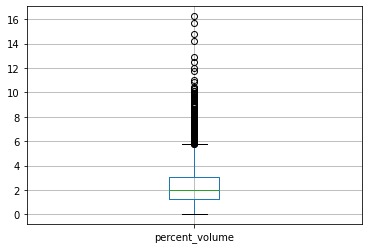

In [39]:
data[["percent_volume"]].boxplot()

<AxesSubplot:>

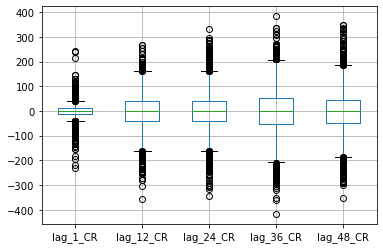

In [42]:
data[["lag_1_CR","lag_12_CR", "lag_24_CR", "lag_36_CR","lag_48_CR"]].boxplot()

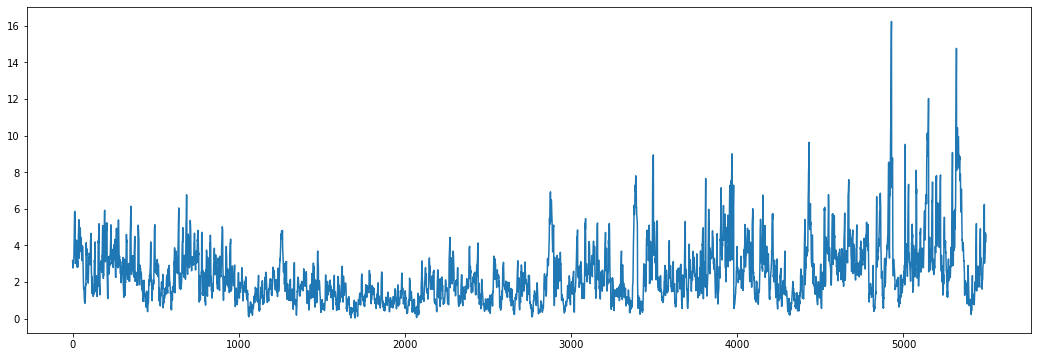

In [3]:
data['percent_volume'].plot(figsize=(18,6));

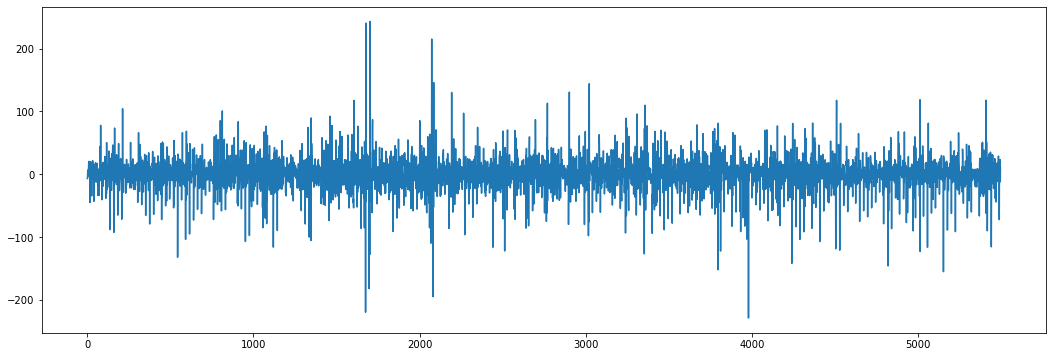

In [4]:
data['lag_1_CR'].plot(figsize=(18,6));

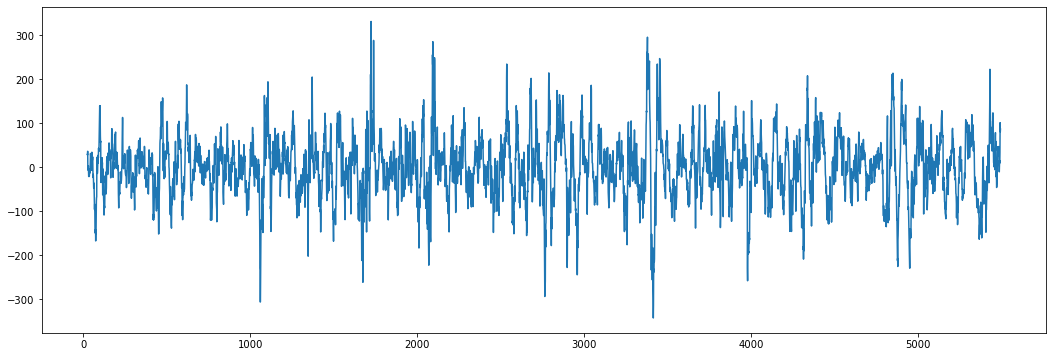

In [5]:
data['lag_24_CR'].plot(figsize=(18,6));

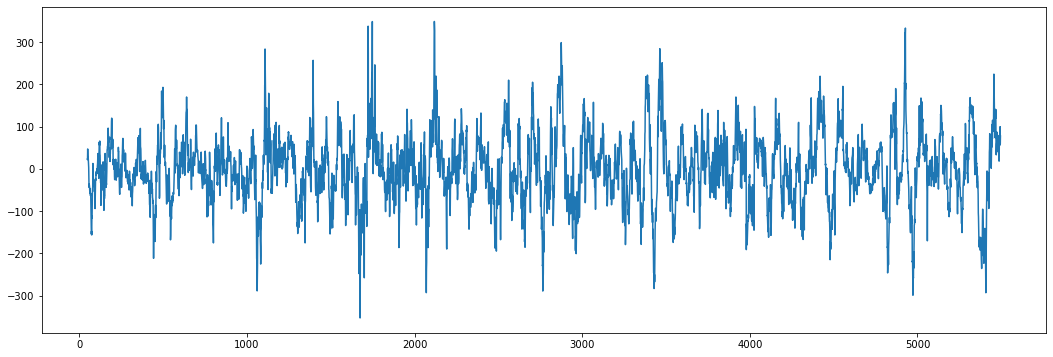

In [6]:
data['lag_48_CR'].plot(figsize=(18,6));

### Decompose Time-Series to see Individual Components (trend + seasonality + noise)

https://coderzcolumn.com/tutorials/data-science/how-to-remove-trend-and-seasonality-from-time-series-data-using-python-pandas

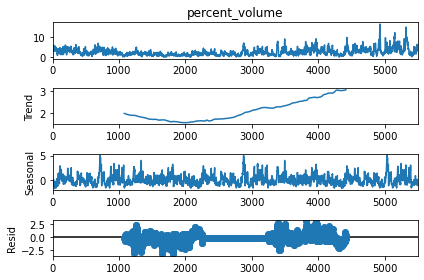

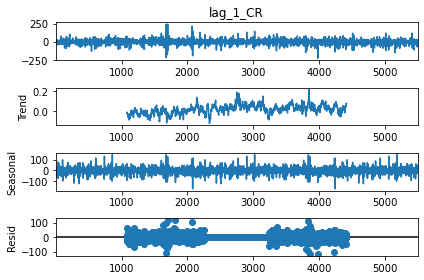

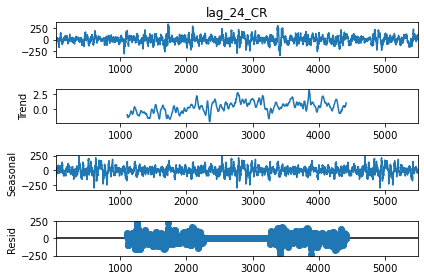

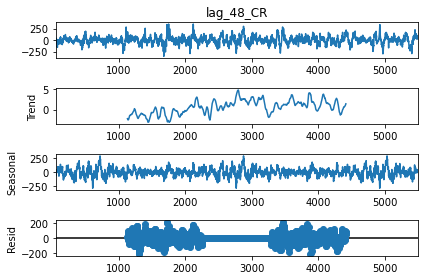

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_result4 = seasonal_decompose(data['percent_volume'], period = 24*90, model="additive")
trend4 = decompose_result4.trend
seasonal4 = decompose_result4.seasonal
residual4 = decompose_result4.resid

decompose_result5 = seasonal_decompose(data['lag_1_CR'][1:], period = 24*90, model="additive")
trend5 = decompose_result5.trend
seasonal5 = decompose_result5.seasonal
residual5 = decompose_result5.resid

decompose_result6 = seasonal_decompose(data['lag_24_CR'][24:], period = 24*90, model="additive")
trend6 = decompose_result6.trend
seasonal6 = decompose_result6.seasonal
residual6 = decompose_result6.resid

decompose_result7 = seasonal_decompose(data['lag_48_CR'][48:], period = 24*90, model="additive")
trend7 = decompose_result7.trend
seasonal7 = decompose_result7.seasonal
residual7 = decompose_result7.resid

decompose_result4.plot()
decompose_result5.plot()
decompose_result6.plot()
decompose_result7.plot();

### **Dicky-Fuller Test for Stationarity**

- `p-value > 0.05`: This implies that time-series is non-stationary.
- `p-value <=0.05`: This implies that time-series is stationary.



In [8]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(data['lag_1_CR'][1:], autolag = "BIC" )

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Method to use when automatically determining the lag length : ", 'BIC' )
print("5. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("6. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)


1. ADF :  -17.438611290628167
2. P-Value :  4.723113381109106e-30
3. Num Of Lags :  23
4. Method to use when automatically determining the lag length :  BIC
5. Num Of Observations Used For ADF Regression and Critical Values Calculation : 5471
6. Critical Values :
	 1% :  -3.4315458272402592
	 5% :  -2.8620684363437117
	 10% :  -2.5670512855848058


In [9]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(data['lag_24_CR'][24:], autolag = "BIC" )

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Method to use when automatically determining the lag length : ", 'BIC' )
print("5. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("6. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)


1. ADF :  -14.272777108687867
2. P-Value :  1.365288140936965e-26
3. Num Of Lags :  25
4. Method to use when automatically determining the lag length :  BIC
5. Num Of Observations Used For ADF Regression and Critical Values Calculation : 5446
6. Critical Values :
	 1% :  -3.4315513193059908
	 5% :  -2.8620708627986335
	 10% :  -2.5670525772661414


In [10]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(data['lag_48_CR'][48:], autolag = "BIC" )

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Method to use when automatically determining the lag length : ", 'BIC' )
print("5. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("6. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)


1. ADF :  -14.661269028806558
2. P-Value :  3.378483869548665e-27
3. Num Of Lags :  1
4. Method to use when automatically determining the lag length :  BIC
5. Num Of Observations Used For ADF Regression and Critical Values Calculation : 5446
6. Critical Values :
	 1% :  -3.4315513193059908
	 5% :  -2.8620708627986335
	 10% :  -2.5670525772661414


### Preparation

- Define functions for the creation of rolling windows and visualizations for final results.
- The output of rolling window function include both predictors and response variable

In [12]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer_size):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size+1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size+1)) # Convert each window to numpy format
    dataset = dataset.shuffle(shuffle_buffer_size, seed = 123).map(lambda window: (window[:-1], window[-1])) # Shuffle data and Retrieve features and response variable
    dataset = dataset.batch(batch_size).prefetch(1) # Combines consecutive elements of this dataset into batches
    return dataset
def plot_series(time, series, title, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.title(title)
    plt.grid(True)

# 2. LR Model --- lag_1_CR Prediction

- split the data to training set, validate set, and final test set
- define some variables

In [11]:
tf.keras.backend.clear_session()
tf.random.set_seed(1234) # Set the global random seed.
np.random.seed(1234)

# Retrieve the data
lag_n = 1 # Only Change this
col_name = 'lag_'+str(lag_n)+'_CR'
time = data['datetime_id']
time = time.to_numpy()[lag_n:]
CR_series = data[col_name]
CR_series = CR_series.to_numpy()[lag_n:]
volume_series =data['percent_volume']
volume_series = volume_series.to_numpy()[lag_n:]


# Split dataset
split_time1 = 3000  
split_time2 = 4000
## Traing set
time_train = time[:split_time1]
x_train = CR_series[:split_time1]
## Validatiin set
time_valid = time[split_time1:split_time2]
x_valid = CR_series[split_time1:split_time2]
## Final test set
time_test = time[split_time2:]
x_test = CR_series[split_time2:]

window_size = 3
batch_size = 30
shuffle_buffer_size = 3000

- **Modeling**
    - Generate rolling windows
    - Train the model

In [13]:
dataset = windowed_dataset(series = x_train, 
                           window_size = window_size, 
                           batch_size = batch_size, 
                           shuffle_buffer_size = shuffle_buffer_size)
print(dataset)

model = tf.keras.models.Sequential([tf.keras.layers.Dense(units = 1, input_shape=[window_size], activation='linear'), # units: Positive integer, dimensionality of the output space.
                                    tf.keras.layers.Lambda(lambda x: x * 100) # scale_layer
                                   ])

model.compile(loss="mae", optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9))
model.fit(dataset,epochs=100,verbose=0)

<PrefetchDataset shapes: ((None, None), (None,)), types: (tf.float64, tf.float64)>


- **Make Prediction**
    - Make prediction for the entire timeline (from timestamp window_size+1 to timestamp 5496): **forecast**
    - Retrieve the predicted value for validation set: **results_valid**
    - Retrieve the predicted value for train set: **results_train**
    - Retrieve the predicted value for test set: **results_test**

In [18]:
forecast = []

for timestamp in range(len(volume_series) - window_size):
    forecast.append(model.predict(CR_series[timestamp:timestamp + window_size][np.newaxis]))

# predicted value on training set
forecast_train = forecast[:split_time1-window_size]
results_train = np.array(forecast_train)[:, 0, 0]

# predicted value on validate set
forecast_valid = forecast[split_time1-window_size:split_time2-window_size]
results_valid = np.array(forecast_valid)[:, 0, 0]

# predicted value on test set
forecast_test = forecast[split_time2-window_size:]
results_test = np.array(forecast_test)[:, 0, 0]

- **Model Performance**

In [19]:
print("Static-MAE(test set) =", tf.keras.metrics.mean_absolute_error(CR_series[split_time2:], CR_series[split_time2-1:-1]).numpy())
print("Static-RMSE(test set) =", math.sqrt(tf.keras.metrics.mean_squared_error(CR_series[split_time2:], CR_series[split_time2-1:-1]).numpy()))

Static-MAE(test set) = 21.410592542723904
Static-RMSE(test set) = 33.35934572935895


In [20]:
print("LR-MAE(training set) =", tf.keras.metrics.mean_absolute_error(x_train[window_size:], results_train).numpy())
print("LR-RMSE(training set) =", math.sqrt(tf.keras.metrics.mean_squared_error(x_train[window_size:], results_train).numpy()))
print("LR-MAE(valid set) =", tf.keras.metrics.mean_absolute_error(x_valid, results_valid).numpy())
print("LR-RMSE(valid set) =", math.sqrt(tf.keras.metrics.mean_squared_error(x_valid, results_valid).numpy()))
print("LR-MAE(test set) =", tf.keras.metrics.mean_absolute_error(x_test, results_test).numpy())
print("LR-RMSE(test set) =", math.sqrt(tf.keras.metrics.mean_squared_error(x_test, results_test).numpy()))

LR-MAE(training set) = 17.378883
LR-RMSE(training set) = 27.152398541971042
LR-MAE(valid set) = 17.17948
LR-RMSE(valid set) = 27.625853926635124
LR-MAE(test set) = 16.176867
LR-RMSE(test set) = 25.714310588521887


Parameter Tuning:

|window_size|MAE(valid set)|RMSE(valid set)|
|-----------|--------------|---------------|
|2|17.17948|27.625853926635124|
|3|17.842566|16.241488|
|4|18.924719|27.22440585073954|

- **Visualization for predicted CR**

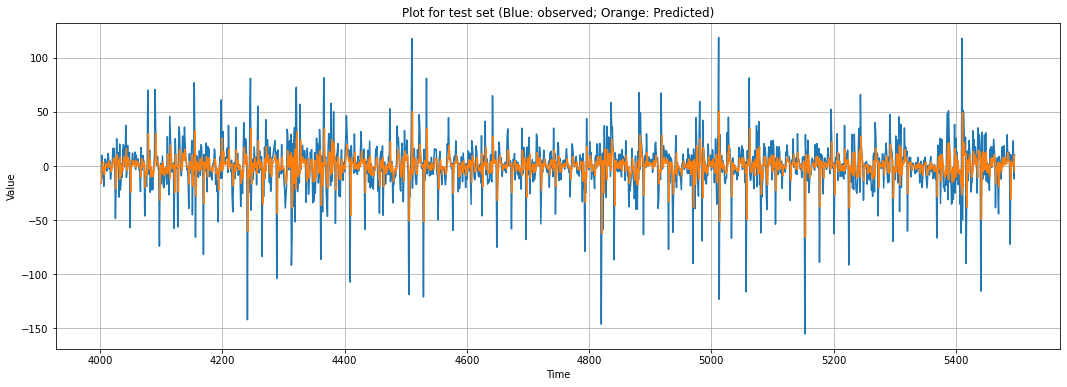

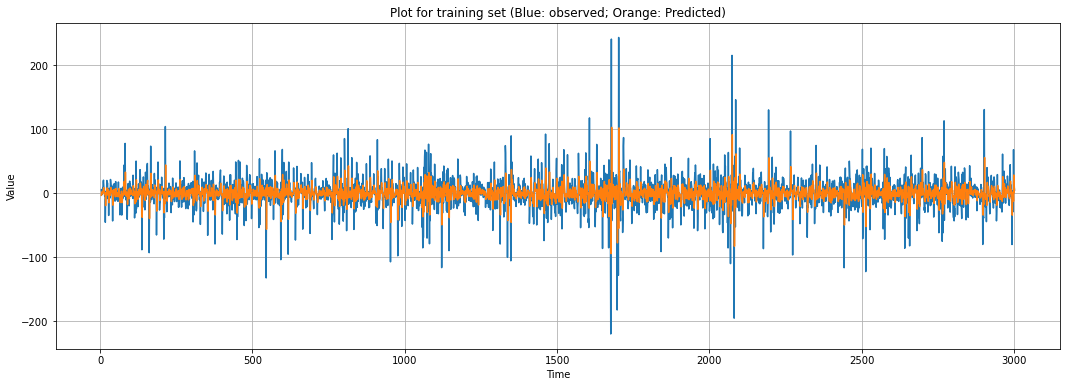

In [21]:
plt.figure(figsize=(18, 6))
plot_series(time_test, x_test, title = "Plot for test set (Blue: observed; Orange: Predicted)")
plot_series(time_test, results_test, title = "Plot for test set (Blue: observed; Orange: Predicted)");
# Blue: x_valid (observed); Orange: results_valid(predicted)

plt.figure(figsize=(18, 6))
plot_series(time_train[window_size:], x_train[window_size:], title = "Plot for training set (Blue: observed; Orange: Predicted)")
plot_series(time_train[window_size:], results_train, title = "Plot for training set (Blue: observed; Orange: Predicted)");

- **Convert CR to percent_volume**

Static-MAE(test set) = 0.44490762860328087
Static-RMSE(test set) = 0.8316491381939671
LR-MAE(test set) = 1.0550564948170973
LR-RMSE(test set) = 1.305611729939021


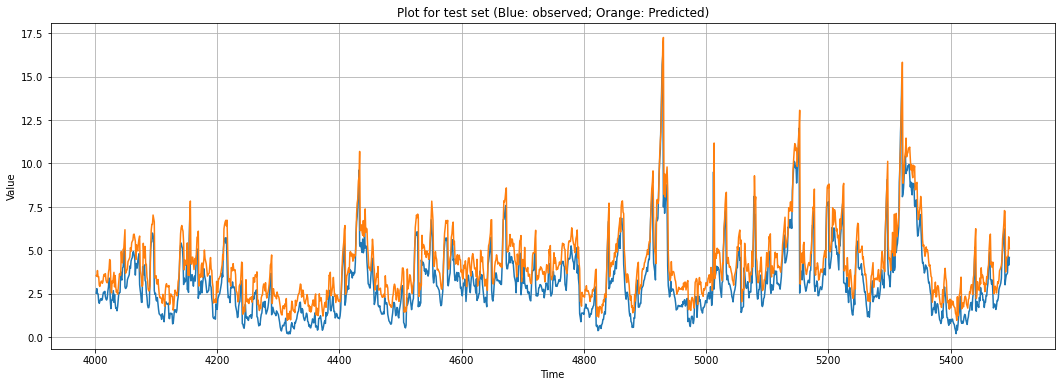

In [25]:
lag_volume = volume_series[split_time2-lag_n:-lag_n]
pred_volume_test = lag_volume+np.exp(results_test*0.01)
print("Static-MAE(test set) =", tf.keras.metrics.mean_absolute_error(volume_series[split_time2:], volume_series[split_time2-lag_n:-lag_n]).numpy())
print("Static-RMSE(test set) =", math.sqrt(tf.keras.metrics.mean_squared_error(volume_series[split_time2:], volume_series[split_time2-lag_n:-lag_n]).numpy()))
print("LR-MAE(test set) =", tf.keras.metrics.mean_absolute_error(volume_series[split_time2:], pred_volume_test).numpy())
print("LR-RMSE(test set) =", math.sqrt(tf.keras.metrics.mean_squared_error(volume_series[split_time2:], pred_volume_test).numpy()))

plt.figure(figsize=(18, 6))
plot_series(time_test, volume_series[split_time2:], title = "Plot for test set (Blue: observed; Orange: Predicted)")
plot_series(time_test, pred_volume_test, title = "Plot for test set (Blue: observed; Orange: Predicted)");